# Rescaled Range Analysis

https://en.wikipedia.org/wiki/Rescaled_range

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [16]:
def RescaledRangeAnalysis(x):
    xm = np.mean(x)
    y = x - xm
    z = np.cumsum(y)
    
    R = np.empty(len(z))
    for t in range(len(z)):
        R[t] = max(z[:t+1]) - min(z[:t+1])
        
       
    S = np.empty(len(x))
    for t in range(len(x)):
        S[t] = np.std(x[:t+1])
        
        
    #I have to avoid returning the first 10th elements because the std of a single term is 0 => avoid division by 0 and I can have a sequence of 00000
    return R[1:]/S[1:] 

# Random Walk

Random walk should have a Hurst exponent of 0.5

https://towardsdatascience.com/random-walks-with-python-8420981bc4bc

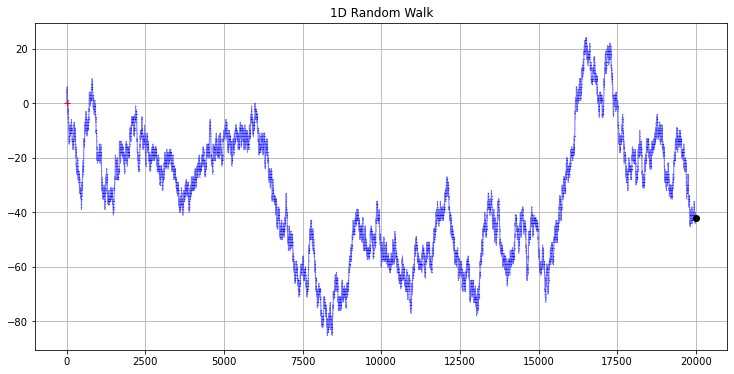

In [21]:
# Define parameters for the walk
dims = 1
step_n = 20000
step_set = [-1, 0, 1]
origin = np.zeros((1,dims))

# Simulate steps in 1D
step_shape = (step_n,dims)
steps = np.random.choice(a=step_set, size=step_shape)
path = np.concatenate([origin, steps]).cumsum(0)
start = path[:1]
stop = path[-1:]

# Plot the path
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(np.arange(step_n+1), path, c="blue",alpha=0.25,s=0.05);
ax.plot(path,c="blue",alpha=0.5,lw=1,ls='-',);
ax.plot(0, start, c="red", marker="+")
ax.plot(step_n, stop, c="black", marker="o")
plt.grid()
plt.title("1D Random Walk")
plt.tight_layout(pad=0)


#path is my vector containing random walk data

In [22]:
%%time

R_over_S = RescaledRangeAnalysis(path) #Outout of the above algorithm

t = np.array(range(len(R_over_S))) + 1 #Number of samples used to perform the algorithm

CPU times: user 32.2 s, sys: 64.3 ms, total: 32.3 s
Wall time: 32.3 s


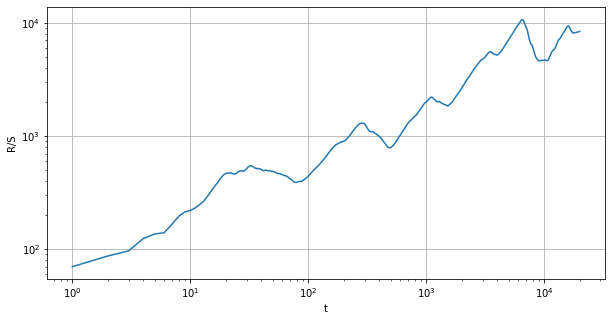

In [23]:
plt.figure(figsize=(10,5))
plt.loglog(t, R_over_S)
plt.grid()
plt.xlabel("t")
plt.ylabel("R/S")
plt.show()

In [24]:
reg = LinearRegression().fit(np.log10(t).reshape(-1, 1), np.log10(R_over_S))

hurst = reg.coef_[0]
intercept = reg.intercept_

In [25]:
hurst

0.4767469427977448

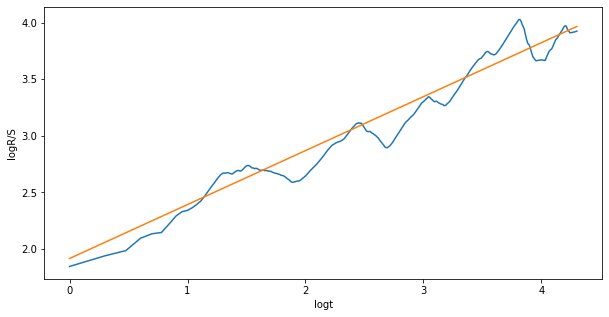

In [26]:
x = np.linspace(0, max(np.log10(t)), step_n)
y = hurst*x + intercept

plt.figure(figsize=(10,5))
plt.plot(np.log10(t), np.log10(R_over_S))
plt.plot(x, y)
plt.xlabel("logt")
plt.ylabel("logR/S")
plt.show()